In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
sns.set_palette("Blues_d")

from IPython.display import HTML

# import the widgets module
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")
import scipy.io
import scipy 
import bct

In [2]:
rest = pd.read_csv('M.csv')
rest.head(10)

,0,-0.00513903101247647,0.296243177508233,0.0076956190217564,0.144807196405978,0.137420803310388,0.0437202753962534,-0.0272613952249935,0.0438021577144932,0.193802127119247,...,0.041524555922357,-0.116913223563516,-0.158905569204267,-0.0224801975382818,-0.178433873793129,-0.0518367872652459,-0.167257703761858,0.179576147373585,-0.0527915550794728,0.0166662872075415
0,-0.005139,0.000000,0.140819,0.421863,0.479531,0.366052,-0.055726,-0.020275,0.139415,0.132016,...,0.205794,0.198387,0.178350,0.093792,0.177931,0.212306,0.228239,0.210892,-0.006419,-0.003687
1,0.296243,0.140819,0.000000,0.178093,0.232132,0.439772,-0.047182,-0.064636,-0.014085,0.454373,...,0.390922,-0.095946,-0.121491,0.204951,-0.264190,0.124576,-0.141236,0.208200,-0.001089,0.042623
2,0.007696,0.421863,0.178093,0.000000,0.296873,0.306993,0.341885,-0.142228,0.012270,0.142853,...,0.183201,-0.015678,0.099959,0.004320,0.026470,0.032583,-0.056540,0.270857,-0.002043,-0.018756
3,0.144807,0.479531,0.232132,0.296873,0.000000,0.468417,0.054540,0.198273,0.516613,0.319583,...,0.383272,-0.003946,0.281991,0.158117,0.029563,0.298923,0.155730,0.149713,0.032820,0.083110
4,0.137421,0.366052,0.439772,0.306993,0.468417,0.000000,0.008335,0.008865,0.135024,0.313027,...,0.416886,-0.044247,0.075592,0.282240,-0.077755,0.133171,-0.112245,0.282834,0.032891,0.088950
5,0.043720,-0.055726,-0.047182,0.341885,0.054540,0.008335,0.000000,-0.161817,0.126829,0.224109,...,-0.014208,-0.117163,0.111057,-0.102108,-0.071275,-0.055035,-0.011774,0.084255,0.001965,-0.017487
6,-0.027261,-0.020275,-0.064636,-0.142228,0.198273,0.008865,-0.161817,0.000000,0.061973,0.016871,...,0.288391,-0.096321,-0.049083,0.118437,-0.082057,0.121004,0.044008,0.033990,0.045738,0.029299
7,0.043802,0.139415,-0.014085,0.012270,0.516613,0.135024,0.126829,0.061973,0.000000,0.218386,...,-0.028296,-0.170113,0.204634,-0.028441,0.052674,0.193602,0.028040,0.027916,-0.042200,0.055579
8,0.193802,0.132016,0.454373,0.142853,0.319583,0.313027,0.224109,0.016871,0.218386,0.000000,...,0.306025,-0.192098,-0.070203,0.044969,-0.361574,0.112092,-0.101090,0.207440,-0.022436,0.037572
9,0.095577,-0.127811,0.129136,0.111944,-0.064521,0.165879,0.295624,-0.101203,0.129165,0.442094,...,-0.007638,-0.122191,-0.015012,-0.100217,-0.293331,-0.084143,-0.181419,0.231320,0.004235,0.053552


In [3]:
resting = []
resting.append(list(rest.columns))
resting = np.array(resting)

In [4]:
for i in np.arange(235):
    resting = np.vstack((resting, np.array(list(rest.iloc[i, :]))))

In [5]:
resting.shape

(236, 236)

In [6]:
resting = resting.astype(float)

In [7]:
restarr = np.array(rest)

In [8]:
len(restarr), restarr.shape

(235, (235, 236))

In [9]:
counteri = 0 
for i in resting:
    counterj = 0
    for j in i:
        if j < 0:
            resting[counteri][counterj] = 0
        counterj +=1
        
    counteri += 1

In [10]:
import scipy.io
mat = scipy.io.loadmat('resultsROI_Subject001_Condition002.mat')

In [11]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'names', 'xyz', 'Z', 'DOF', 'names2', 'SE', 'regressors', 'r'])

In [12]:
working = mat['r']

In [13]:
type(working)

numpy.ndarray

In [14]:
counteri = 0 
for i in working:
    counterj = 0
    for j in i:
        if j < 0:
            working[counteri][counterj] = 0
        counterj +=1
        
    counteri += 1

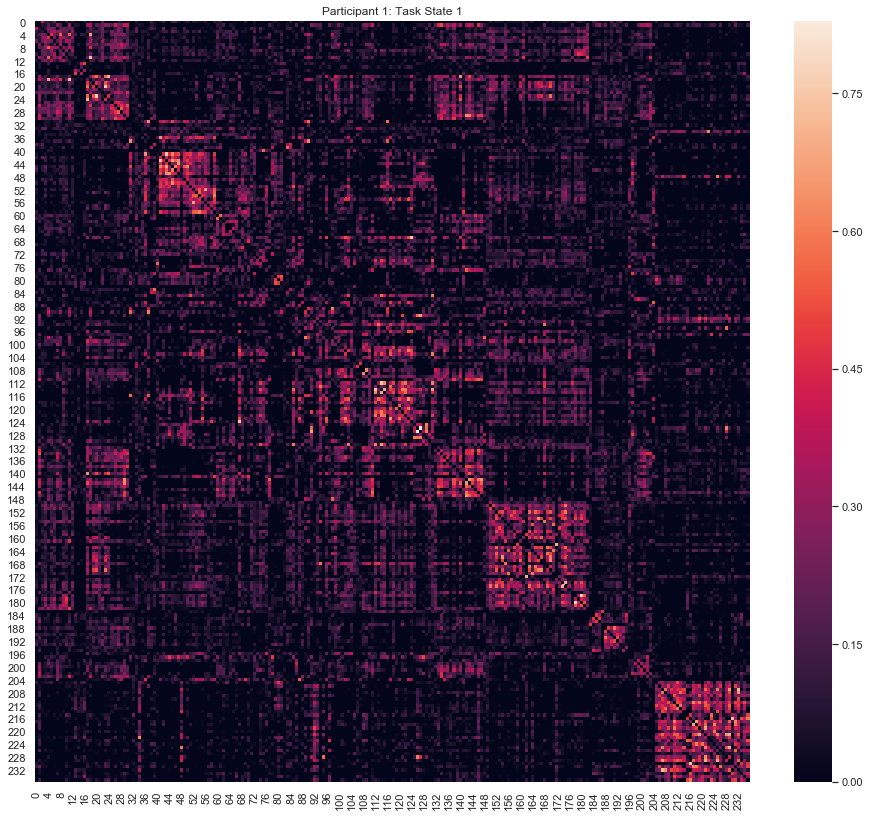

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 14)
sns.heatmap(working)
plt.title('Participant 1: Task State 1');

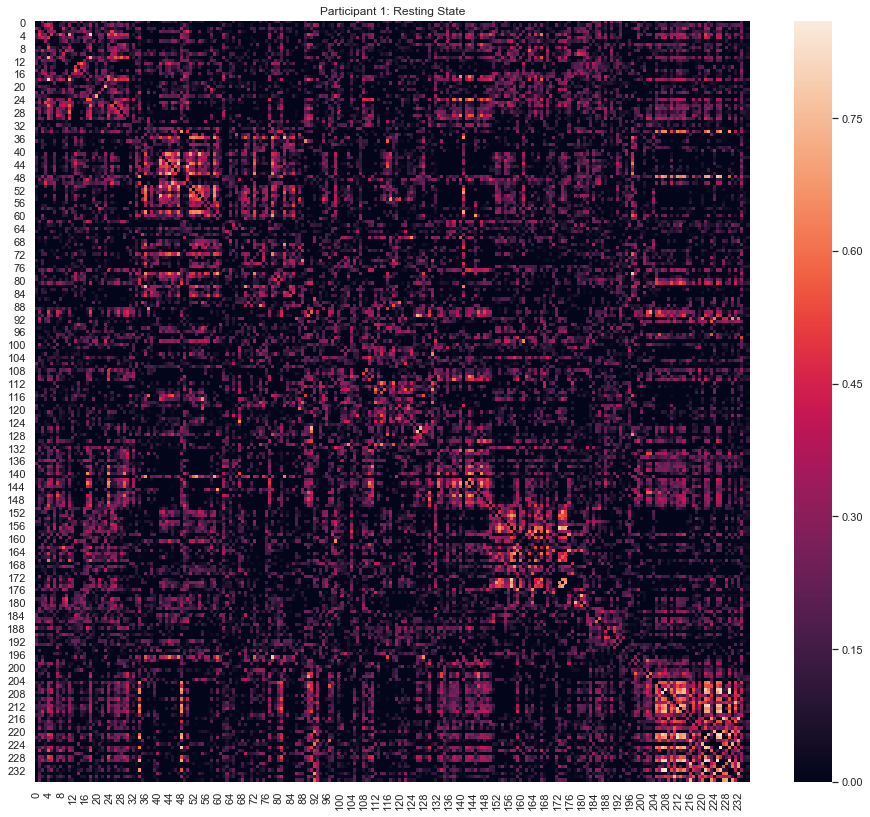

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 14)
sns.heatmap(resting)
plt.title('Participant 1: Resting State');

In [125]:
restdf = pd.DataFrame(resting)

restdf.to_csv('subj001cond001.csv', index=False)

workingdf = pd.DataFrame(working)

workingdf.to_csv('subj001cond002.csv', index=False)

In [17]:
# set diff. thresholds (10%-50%)

def threshold(arr, p):
    # normalizing array 
    #arr = bct.normalize(arr)
    
    #thresholding the array
    return bct.threshold_proportional(arr, p, copy=True)



thresholds = [.1, .2, .3, .4, .5]

restingStates = [threshold(resting, i) for i in thresholds]
workingStates = [threshold(working, i) for i in thresholds]

# Clustering Coefficients

### Weighted, Thresholded Networks

In [18]:
# collect clustering coefficient accross different thresholds (10%-50%) for both 
# RESTING and WORKING state data

def get_clustering_coeff(arr):
    return bct.clustering_coef_wu(arr)




restingClusters = [get_clustering_coeff(i) for i in restingStates]
workingClusters = [get_clustering_coeff(i) for i in workingStates]

In [19]:
# Collecting the average clustering coefficient for WORKING & RESTING states
# accross all thresholds

restingAvgClusters = [np.mean(i) for i in restingClusters]
workingAvgClusters = [np.mean(i) for i in workingClusters]

In [20]:
restingAvgClusters

[0.15209105973393913,
 0.1348173211789563,
 0.12329177084372242,
 0.11189634741883275,
 0.09850244967392581]

In [21]:
workingAvgClusters

[0.1613353252098419,
 0.11844692160766378,
 0.09920269972537894,
 0.0864282615631271,
 0.0737969329512219]

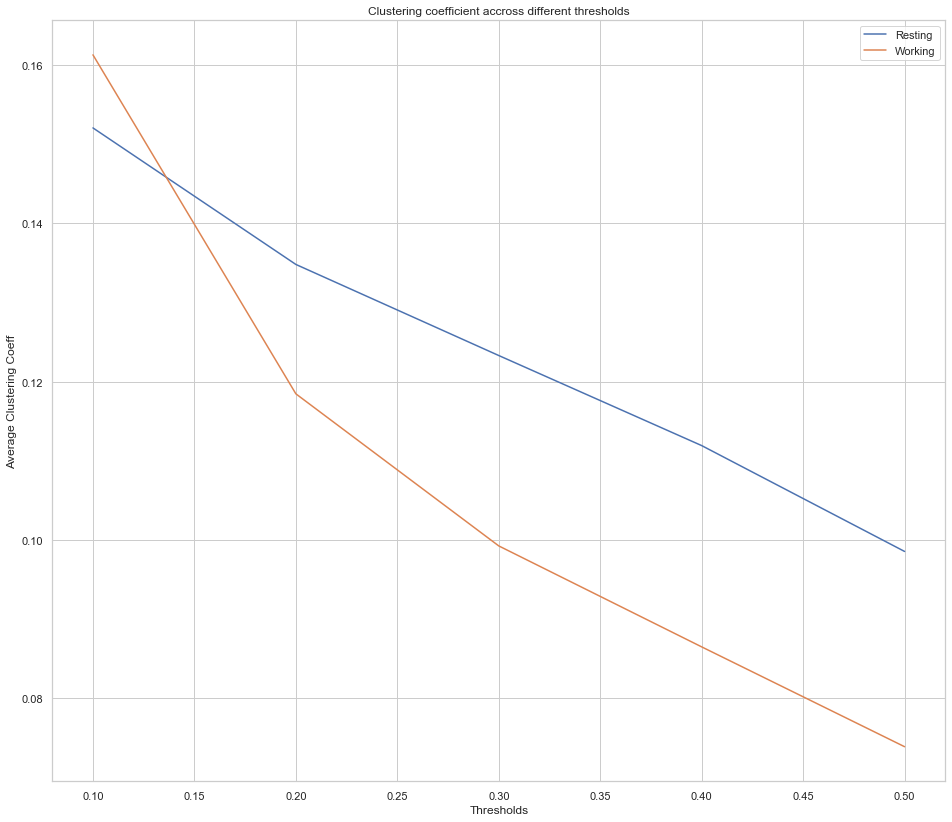

In [22]:
# Plotting the average clustering coefficient accross different thresholds

f, ax = plt.subplots(1, 1)
f.set_size_inches(16, 14)
sns.lineplot(x=thresholds, y=restingAvgClusters)
sns.lineplot(x=thresholds, y=workingAvgClusters)
ax.legend(['Resting', 'Working']);
ax.set(xlabel='Thresholds', ylabel='Average Clustering Coeff', 
       title='Clustering coefficient accross different thresholds');

# Randomizing Weighted Networks

In [23]:
def normalize(arr1, mean):
    output = []
    for i in arr1:
        output.append(i/mean)
    return output

In [76]:
def normalized(val, mean):
    return val/mean

In [ ]:
random_values = {}

def randomize(array, iterations):
    random_arr, eff = bct.randmio_und(array, iterations)
    return random_arr

In [68]:
# randomizing weighted working state matrix (50% threshold)
randomizedStates = []
for i in range(100):
    randomizedStates.append(randomize(workingStates[4], 5))

In [69]:
#obtaining clustering coefficients for each of the randomized matrices
randomizedClusters = [get_clustering_coeff(arr) for arr in randomizedStates]

randomizedAvgClusters = [np.mean(arr) for arr in randomizedClusters]

randomizedAvg = np.mean(randomizedAvgClusters)

In [74]:
# make a dictionary with the avg coefficient value 
# for each randomized network at different thresholds 
random_coeff_values = random_values
random_coeff_values

{40: 0.061320616854484,
 50: 0.05717153241878812,
 10: 0.045354113644254054,
 20: 0.0569552150899332,
 30: 0.061309684811005356}

In [77]:
standardizedWorkingClusters = []

#standardizing working state cluster coefficients
count = 10
for i in workingAvgClusters:
    standardizedWorkingClusters.append(normalized(i, random_coeff_values[count]))
    count += 10

In [79]:
standardizedWorkingClusters

[3.557236868860772,
 2.079650150045684,
 1.618059202737438,
 1.4094486650097542,
 1.2907985815501812]

In [83]:
random_resting_coeff_values = {}

def randomize_d(arr, iterations):
    arr, eff = bct.randmio_dir(arr, iterations)
    return arr

In [103]:
# randomizing weighted resting state matrix (50% threshold)

randomizedRestingStates = []
for i in range(100):
    randomizedRestingStates.append(randomize_d(restingStates[4], 5))

In [104]:
#obtaining clustering coefficients for each of the randomized matrices
randomizedClustersResting = [get_clustering_coeff(arr) for arr in randomizedRestingStates] 

#obtaining average clustering coefficient for each randomized matrix
randomizedAvgClustersResting = [np.mean(arr) for arr in randomizedClustersResting]

randomizedRestingAvg = np.mean(randomizedAvgClustersResting)

In [105]:
randomizedRestingAvg

0.07575845174871473

In [106]:
random_resting_coeff_values[50] = randomizedRestingAvg

In [107]:
random_resting_coeff_values

{10: 0.06438700583186288,
 20: 0.07081836764174537,
 30: 0.0770684416702638,
 40: 0.07941795593271286,
 50: 0.07575845174871473}

In [113]:
standardizedRestingClusters = []

#standardizing working state cluster coefficients
count = 10
for i in restingAvgClusters:
    standardizedRestingClusters.append(normalized(i, random_resting_coeff_values[count]))
    count += 10

In [114]:
restingAvgClusters

[0.15209105973393913,
 0.1348173211789563,
 0.12329177084372242,
 0.11189634741883275,
 0.09850244967392581]

In [115]:
standardizedRestingClusters

[2.3621390336289654,
 1.9037055734038892,
 1.5997698691148377,
 1.4089552684236462,
 1.3002173011752043]

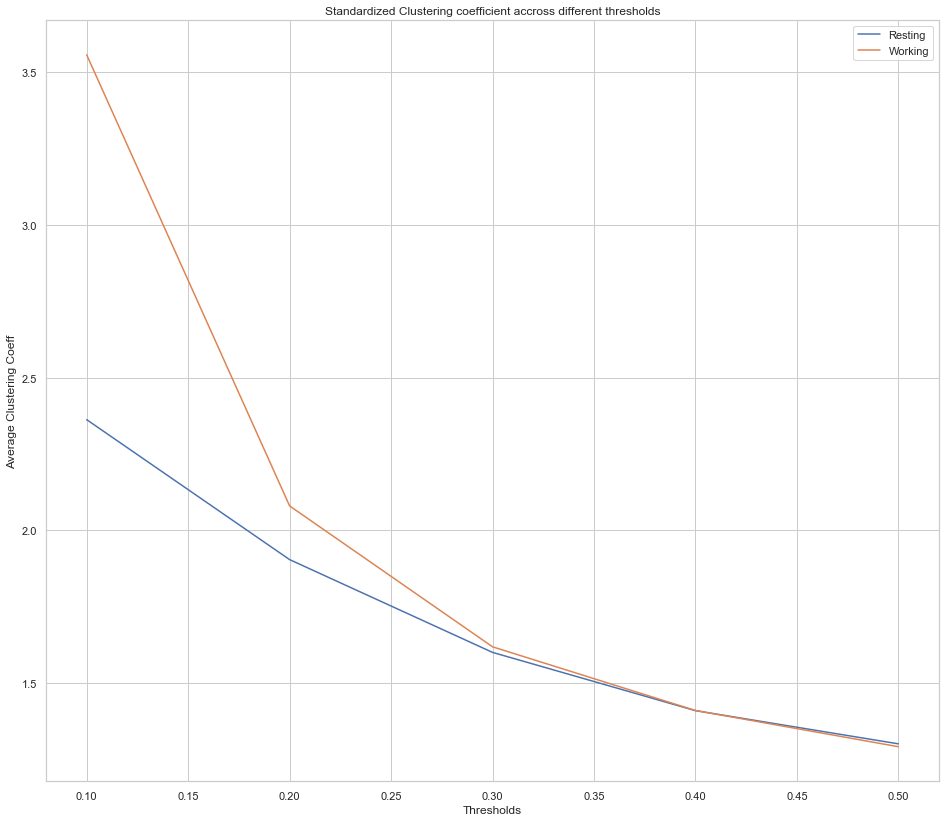

In [116]:
# Plotting the average clustering coefficient accross different thresholds

f, ax = plt.subplots(1, 1)
f.set_size_inches(16, 14)
sns.lineplot(x=thresholds, y=standardizedRestingClusters)
sns.lineplot(x=thresholds, y=standardizedWorkingClusters)
ax.legend(['Resting', 'Working']);
ax.set(xlabel='Thresholds', ylabel='Average Clustering Coeff', 
       title='Standardized Clustering coefficient accross different thresholds');

### Binarized, Thresholded Networks

In [92]:
# collect clustering coefficient accross different thresholds (10%-50%) for both 
# RESTING and WORKING state data

def get_clustering_coeff(arr):
    return bct.clustering_coef_bu(arr)

def binarize(arr):
    return bct.weight_conversion(arr, wcm='binarize')


binarizedRestingStates= [binarize(arr) for arr in restingStates]
binarizedWorkingStates= [binarize(arr) for arr in workingStates]


restingBinarizedClusters = [get_clustering_coeff(i) for i in binarizedRestingStates]
workingBinarizedClusters = [get_clustering_coeff(i) for i in binarizedWorkingStates]

# Collecting the average clustering coefficient for WORKING & RESTING states
# accross all thresholds for binarized networks

BrestingAvgClusters = [np.mean(i) for i in restingBinarizedClusters]
BworkingAvgClusters = [np.mean(i) for i in workingBinarizedClusters]

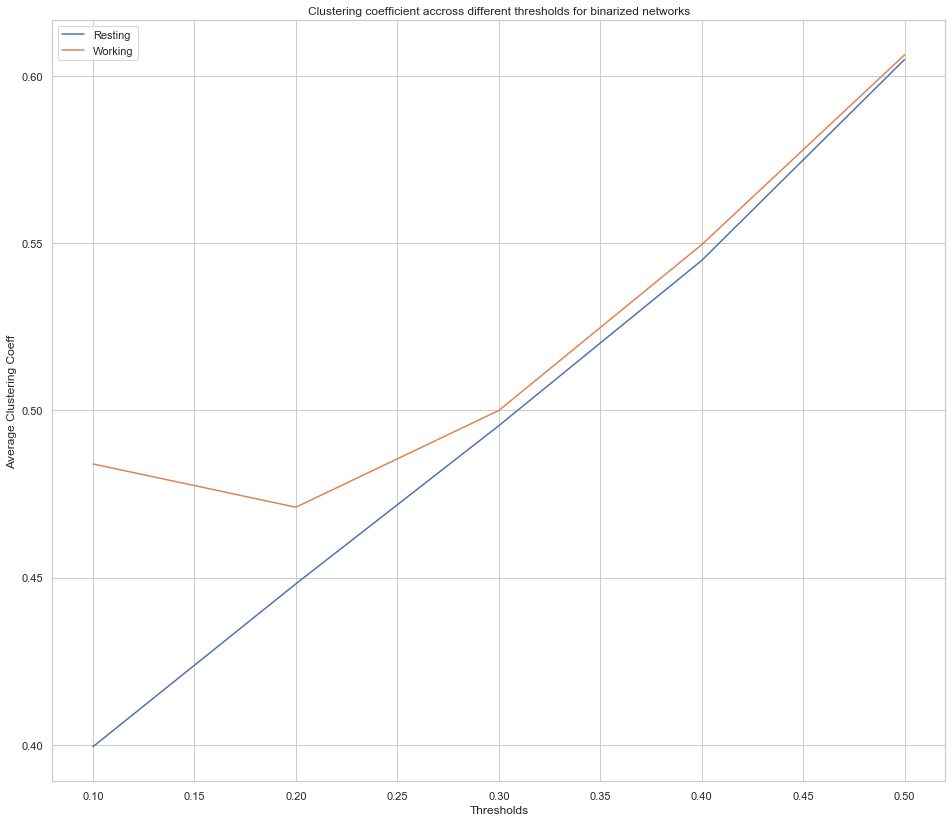

In [93]:
# Plotting the average clustering coefficient accross different thresholds

f, ax = plt.subplots(1, 1)
f.set_size_inches(16, 14)
sns.lineplot(x=thresholds, y=BrestingAvgClusters)
sns.lineplot(x=thresholds, y=BworkingAvgClusters)
ax.legend(['Resting', 'Working']);
ax.set(xlabel='Thresholds', ylabel='Average Clustering Coeff', 
       title='Clustering coefficient accross different thresholds for binarized networks');

# Randomizing Binarized Networks

In [94]:
BstandardizedWorkingClusters = []

def randomize(array, iterations):
    random_arr, eff = bct.randmio_und(array, iterations)
    return random_arr


# randomizing weighted working state matrices 
randomizedStates = [randomize(arr, 5) for arr in binarizedWorkingStates]


#obtaining clustering coefficients for each of the randomized matrices
randomizedClusters = [get_clustering_coeff(arr) for arr in randomizedStates]


#obtaining average clustering coefficient for each randomized matrix
randomizedAvgClusters = [np.mean(arr) for arr in randomizedClusters]

#standardizing working state cluster coefficients
for i, j in zip(BworkingAvgClusters, randomizedAvgClusters):
    BstandardizedWorkingClusters.append(i/j)

In [95]:
BstandardizedRestingClusters = []

def randomize_d(arr, iterations):
    arr, eff = bct.randmio_dir(arr, iterations)
    return arr

# randomizing weighted resting state matrices 
randomizedRestingStates = [randomize_d(arr, 5) for arr in binarizedRestingStates]


# obtaining clustering coefficients for each of the randomized matrices
randomizedClustersResting = [get_clustering_coeff(arr) for arr in randomizedRestingStates]


# obtaining average clustering coefficient for each randomized matrix
randomizedAvgClustersResting = [np.mean(arr) for arr in randomizedClustersResting]


# standardizing resting state cluster coefficients
for i, j in zip(BrestingAvgClusters, randomizedAvgClustersResting):
    BstandardizedRestingClusters.append(i/j)

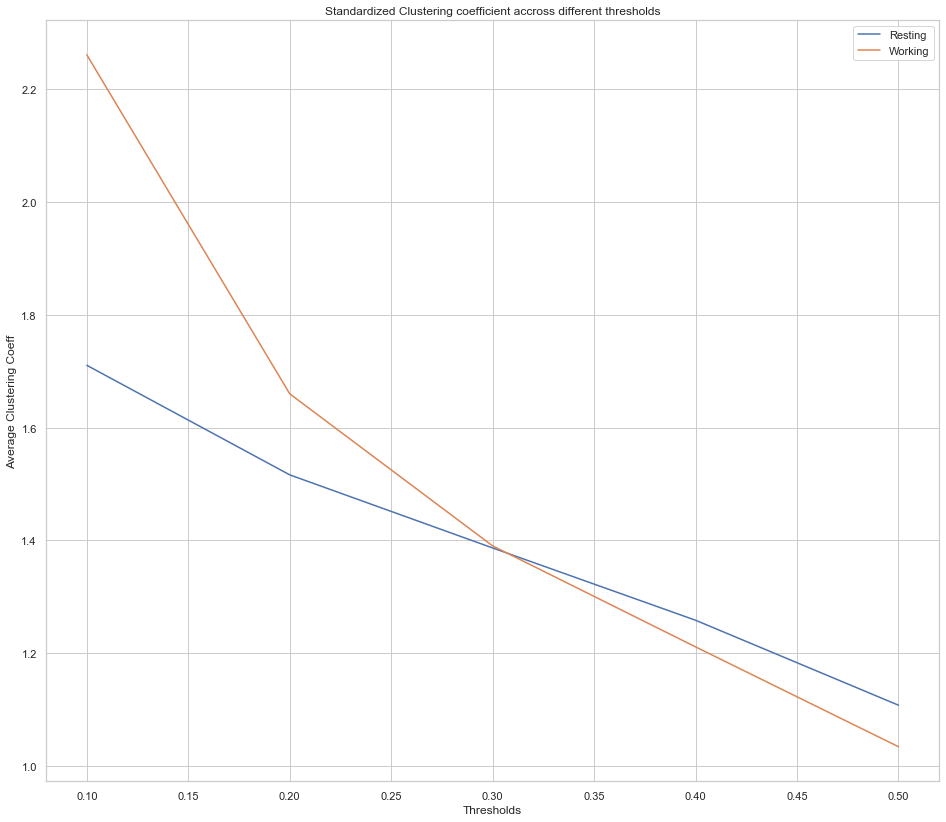

In [96]:
# Plotting the average clustering coefficient accross different thresholds

f, ax = plt.subplots(1, 1)
f.set_size_inches(16, 14)
sns.lineplot(x=thresholds, y=standardizedRestingClusters)
sns.lineplot(x=thresholds, y=standardizedWorkingClusters)
ax.legend(['Resting', 'Working']);
ax.set(xlabel='Thresholds', ylabel='Average Clustering Coeff', 
       title='Standardized Clustering coefficient accross different thresholds');

# Global Efficiency

Global efficiency is the inverse of the characteristic path length.

### Weighted, Binarized Networks

In [50]:
def charpath(array):
    
    # converting to lengths
    array = bct.weight_conversion(array, 'lengths')
    
    # turning into distance array 
    distance_array, other_arr = bct.distance_wei(array)
    
    return bct.charpath(distance_array)

In [51]:
def charpath_bin(array):
    # no need to be done, can be removed
    array = bct.weight_conversion(array, 'lengths')
    
    # turning to binarized distance array
    distance_array, other_array = bct.distance_bin(array)
    return bct.charpath(distance_array, 0, 1)

In [52]:
# global efficiencies for working state networks
efficiencies = [charpath(arr)[1] for arr in workingStates]

# global efficiences for randomized working state networks 
Refficiencies = [charpath(arr)[1] for arr in randomizedStates]

# global efficiencies for resting state networks 
restingEfficiencies = [charpath(arr)[1] for arr in restingStates]

# global efficiencies for randomized resting state networks
restingREfficiencies = [charpath(arr)[1] for arr in randomizedRestingStates]

In [53]:
# weighted working networks
efficiencies

[0.14494493258712587,
 0.14964953269722628,
 0.14978984296172626,
 0.14979093681043062,
 0.14979093681043062]

In [63]:
# randomized working networks
meanRandomEfficiencies = np.mean(Refficiencies)

In [64]:
# weighted resting networks
restingEfficiencies

[0.1826067002798918,
 0.18853258467125286,
 0.18958116804567687,
 0.18960507546627048,
 0.18960507546627048]

In [65]:
# randomized resting networks
meanRandomRestingEfficiencies = np.mean(restingREfficiencies)

In [66]:
def normalize(arr1, mean):
    output = []
    for i in arr1:
        output.append(i/mean)
    return output

In [67]:
normalizedEfficiencies = normalize(efficiencies, meanRandomEfficiencies)

normalizedRestingEfficiencies = normalize(restingEfficiencies, meanRandomRestingEfficiencies)

In [68]:
normalizedEfficiencies

[0.7593100845715048,
 0.7839556533659032,
 0.7846906842283288,
 0.7846964144759297,
 0.7846964144759297]

In [69]:
normalizedRestingEfficiencies

[0.8302753385427137,
 0.8572191235279358,
 0.8619868177848043,
 0.8620955199391975,
 0.8620955199391975]

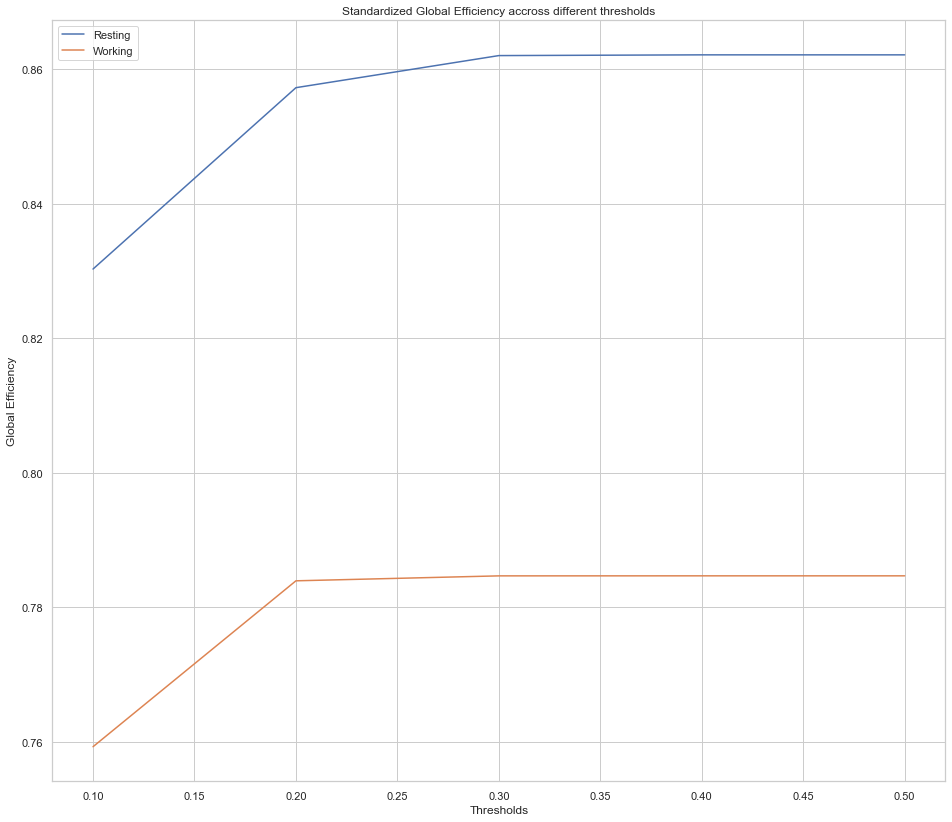

In [70]:
# Plotting the average clustering coefficient accross different thresholds

f, ax = plt.subplots(1, 1)
f.set_size_inches(16, 14)
sns.lineplot(x=thresholds, y=normalizedRestingEfficiencies)
sns.lineplot(x=thresholds, y=normalizedEfficiencies)
ax.legend(['Resting', 'Working']);
ax.set(xlabel='Thresholds', ylabel='Global Efficiency', 
       title='Standardized Global Efficiency accross different thresholds');